In [1]:
import torch
from d2l import torch as d2l

In [4]:
def corr2d_multi_in(X, K):
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [5]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [6]:
def corr2d_multi_in_out(X, K):
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [7]:
K.shape

torch.Size([2, 2, 2])

In [8]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [10]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [11]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    # Matrix multiplication in the fully connected layer
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [12]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

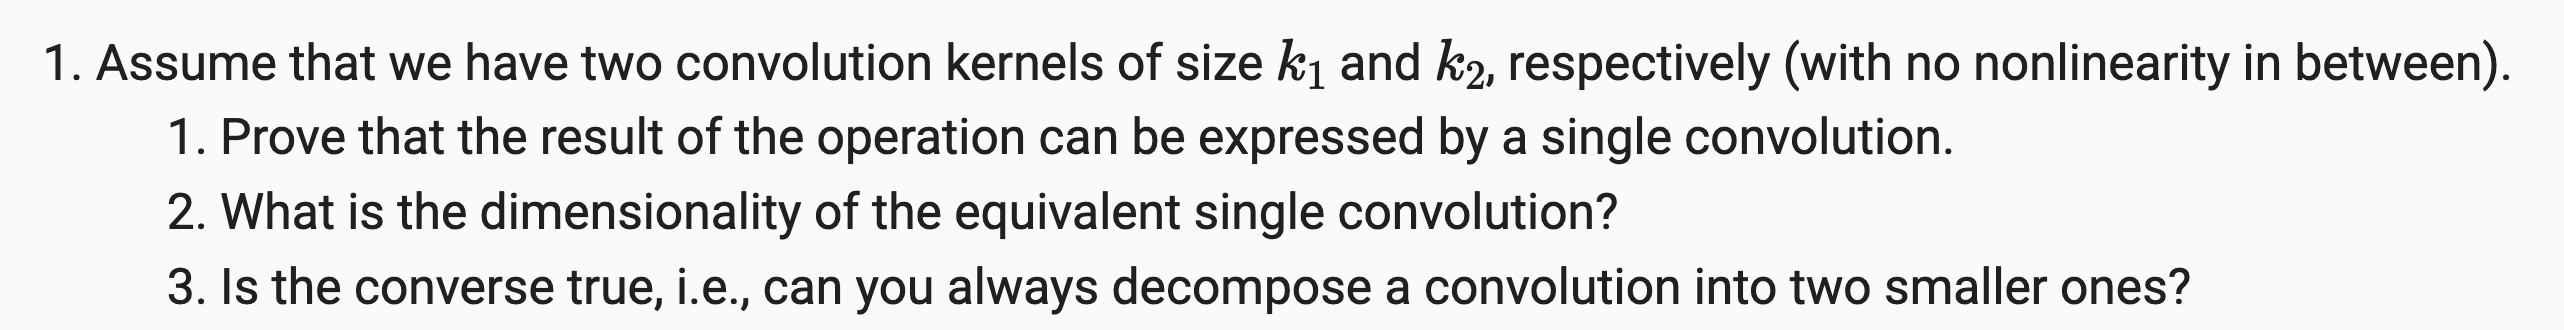

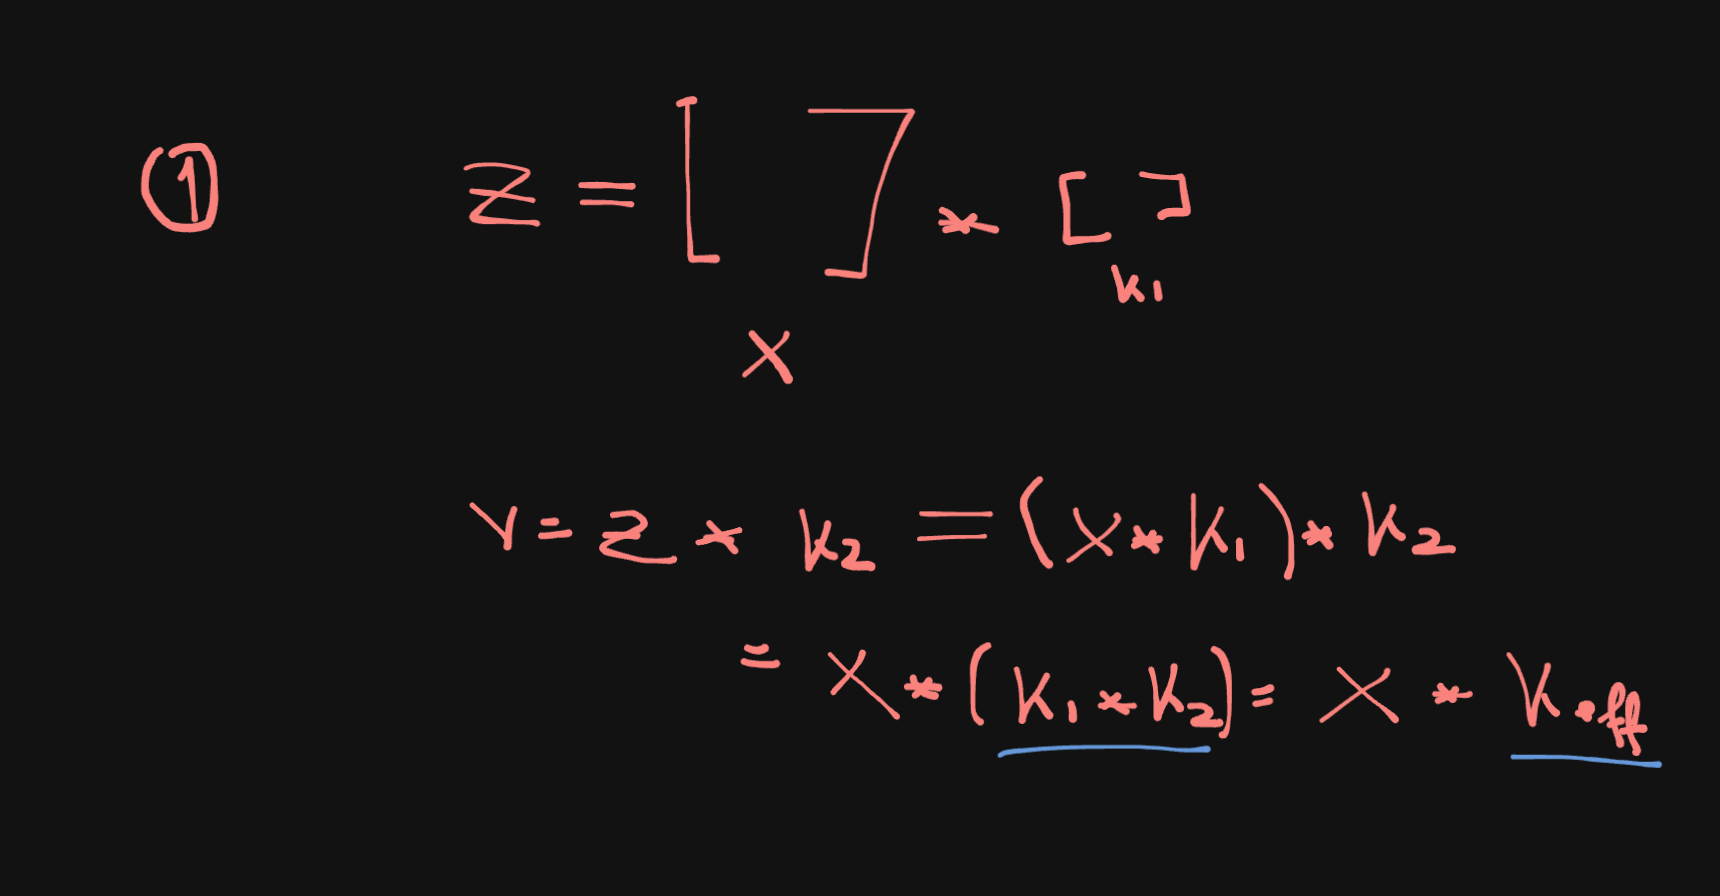

In [20]:
X = torch.randn((12, 12))

K1 = torch.randn((4, 4))
K2 = torch.randn((3, 3))

out1 = d2l.corr2d(d2l.corr2d(X, K1), K2) 
out2 = d2l.corr2d(X, d2l.corr2d(K1, K2))

In [21]:
out1.shape

torch.Size([7, 7])

In [22]:
out2.shape

torch.Size([11, 11])

In [31]:
X = torch.randn(10, 10)
K1 = torch.randn(2, 2)
K2 = torch.randn(3, 3)

Y = d2l.corr2d(d2l.corr2d(X, K1), K2)

K_size = X.shape[0] - Y.shape[0] + 1
K = torch.randn((K_size, K_size), requires_grad=True)
lr = 0.01

for i in range(1000):
    Y_hat = d2l.corr2d(X, K)
    loss = (Y_hat - Y)**2
    loss = loss.sum()
    print(f"{i}. loss = {loss}")

    loss.backward()

    with torch.no_grad():
        K -= lr * K.grad
        K.grad.zero_()

0. loss = 2119.5341796875
1. loss = 588.7238159179688
2. loss = 356.00128173828125
3. loss = 264.25030517578125
4. loss = 215.05926513671875
5. loss = 183.42575073242188
6. loss = 160.75079345703125
7. loss = 143.388427734375
8. loss = 129.50845336914062
9. loss = 118.06394958496094
10. loss = 108.3979721069336
11. loss = 100.07182312011719
12. loss = 92.7806396484375
13. loss = 86.30677032470703
14. loss = 80.49183654785156
15. loss = 75.2187271118164
16. loss = 70.39970397949219
17. loss = 65.96797943115234
18. loss = 61.87196350097656
19. loss = 58.07128143310547
20. loss = 54.533660888671875
21. loss = 51.232906341552734
22. loss = 48.14729690551758
23. loss = 45.258628845214844
24. loss = 42.551292419433594
25. loss = 40.01165008544922
26. loss = 37.62774658203125
27. loss = 35.38886642456055
28. loss = 33.28536605834961
29. loss = 31.308448791503906
30. loss = 29.450056076049805
31. loss = 27.702787399291992
32. loss = 26.059776306152344
33. loss = 24.51460838317871
34. loss = 23

In [36]:
Y_hat

tensor([[ 6.1673,  1.8915, -0.1197, -4.5973,  0.1687, -0.6377, -1.1340],
        [ 3.3253,  7.0680, -2.0616,  0.4487, -0.9356, -1.4086,  0.1747],
        [ 2.8206,  7.2863, -7.6669, -8.1458,  1.0518,  0.8922, -0.2007],
        [-4.8845,  8.0622, -0.4415,  1.2865,  3.0016,  1.7162, -0.5210],
        [-4.8342,  5.9633, -2.9028,  3.8239, -1.2889,  8.3627,  4.0104],
        [ 6.2637, -0.8857, -0.8153, -1.2036,  0.7124, -4.3764,  0.7485],
        [ 7.8345, -1.0324,  2.2067, -2.8745,  3.4773, -4.5531,  2.2821]],
       grad_fn=<CopySlices>)

In [34]:
Y

tensor([[ 6.1673,  1.8915, -0.1197, -4.5973,  0.1687, -0.6377, -1.1340],
        [ 3.3253,  7.0680, -2.0616,  0.4487, -0.9356, -1.4086,  0.1747],
        [ 2.8206,  7.2863, -7.6669, -8.1458,  1.0518,  0.8922, -0.2007],
        [-4.8845,  8.0622, -0.4415,  1.2865,  3.0016,  1.7162, -0.5210],
        [-4.8342,  5.9633, -2.9028,  3.8239, -1.2889,  8.3627,  4.0104],
        [ 6.2637, -0.8857, -0.8153, -1.2036,  0.7124, -4.3764,  0.7485],
        [ 7.8345, -1.0324,  2.2067, -2.8745,  3.4773, -4.5531,  2.2821]])

In [37]:
K

tensor([[ 0.2372,  2.5368, -1.6597,  0.2208],
        [-0.2435,  1.5285, -0.0115,  0.3023],
        [ 0.4166, -0.7183, -0.8982, -0.7389],
        [-0.0690, -0.1172,  0.1247, -0.1414]], requires_grad=True)

In [38]:
K.shape

torch.Size([4, 4])

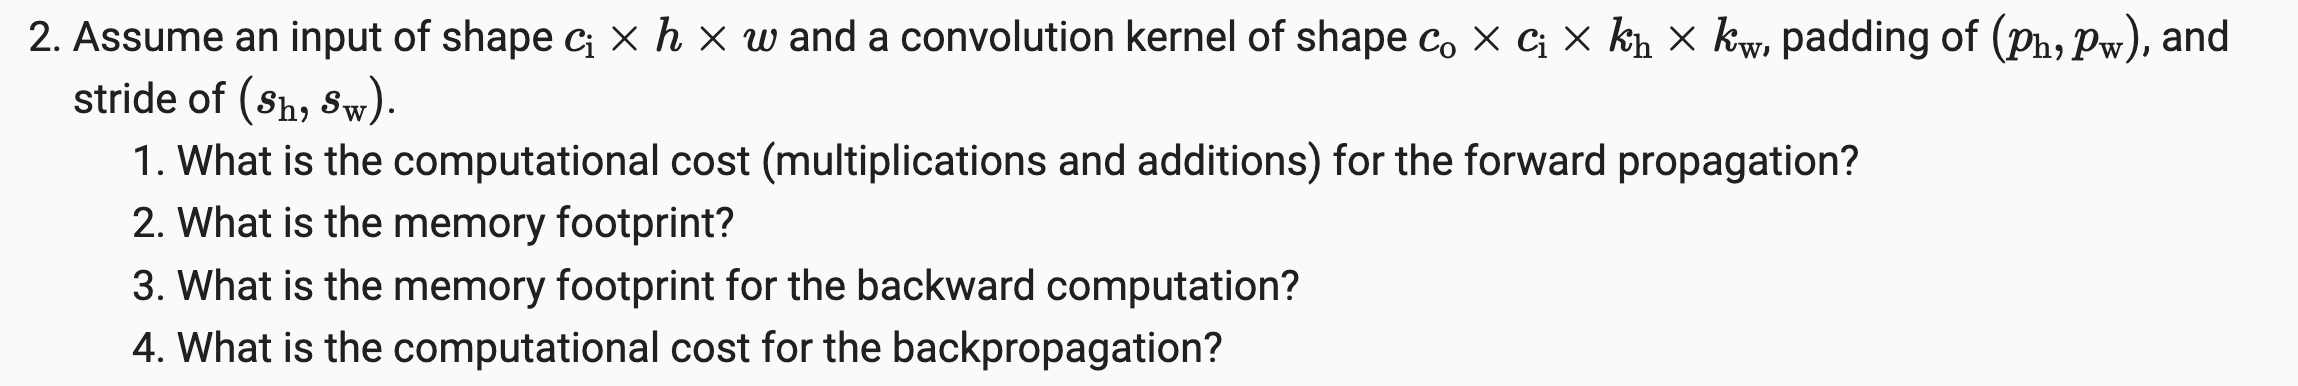

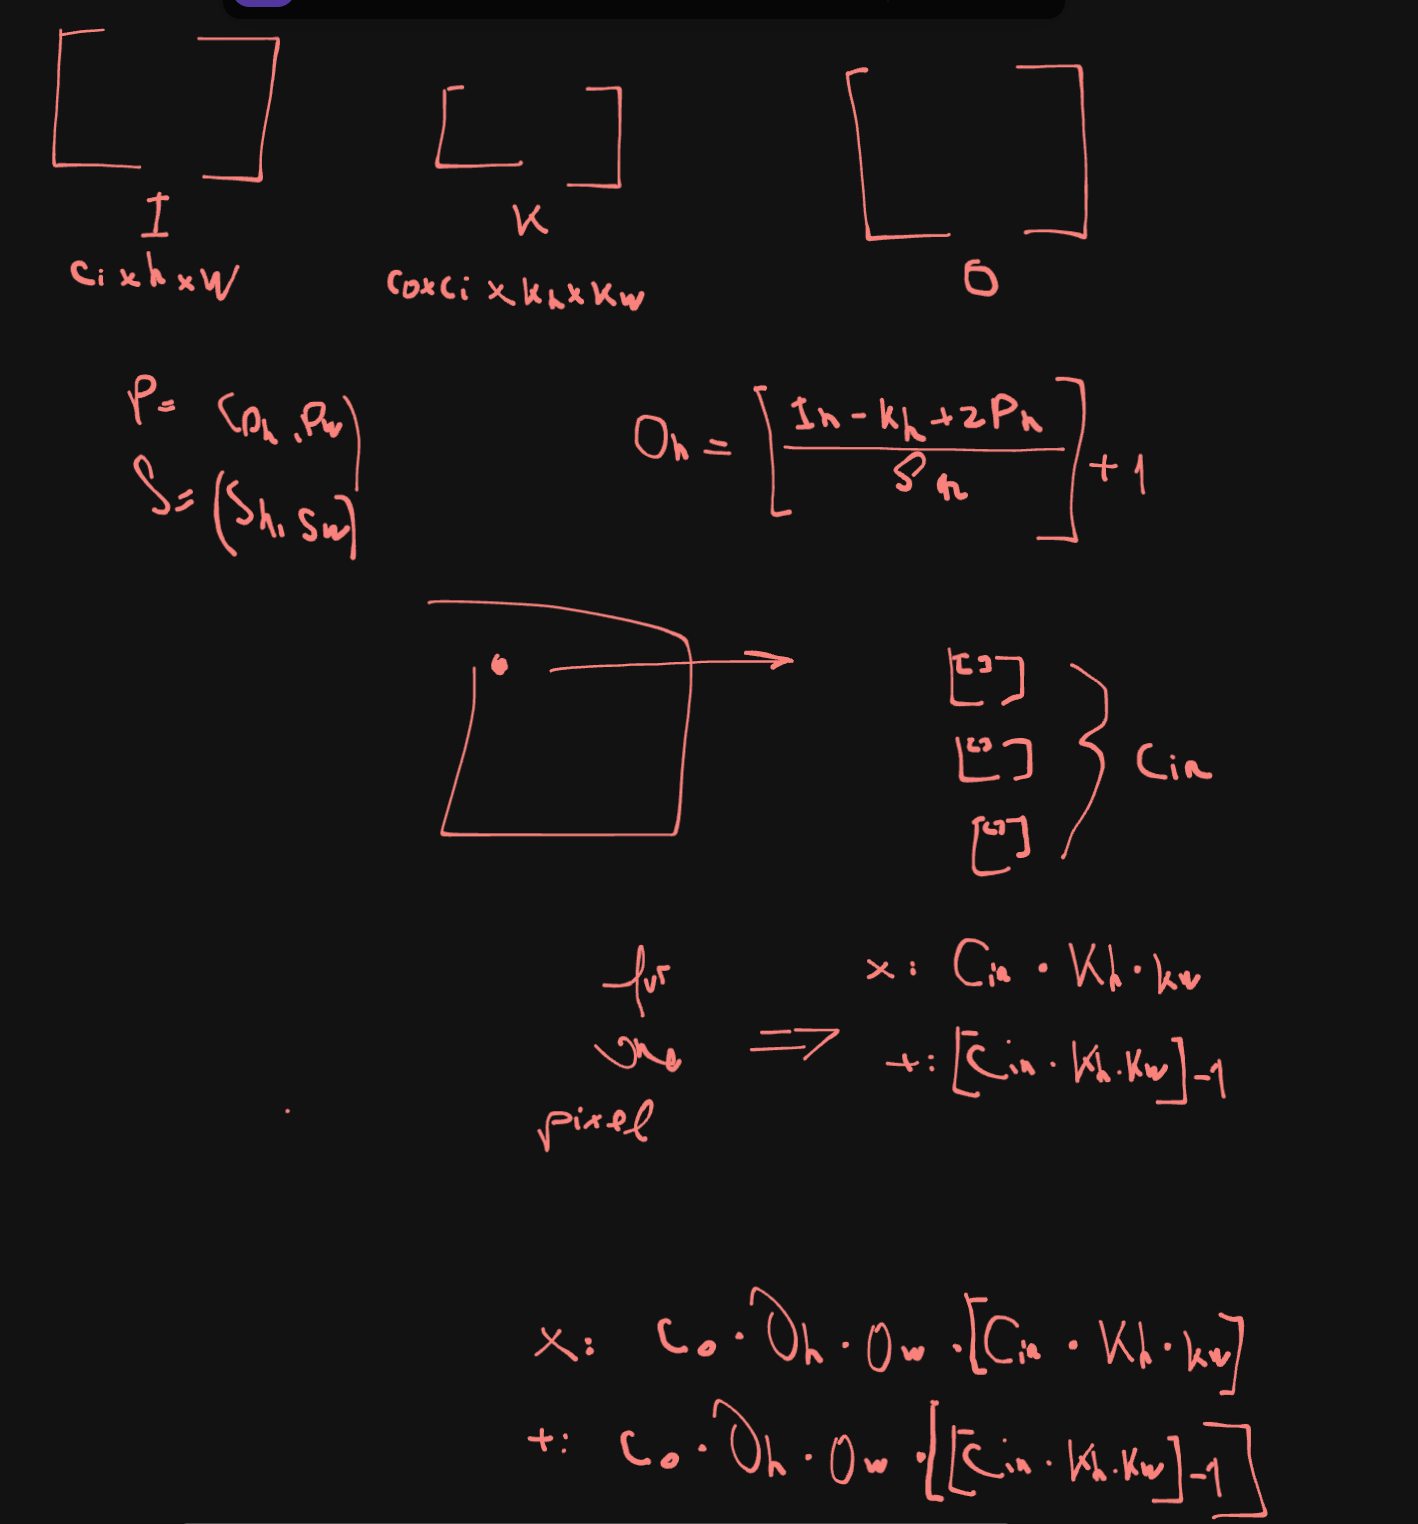

Memory footprint:
$$Memory \approx (S_{input} + S_{params} + S_{output} + S_{workspace}) \times \text{Size}_{dtype}$$

Memory footprint fot the backward computation:
$$Memory_{backward} \approx (S_{grad\_params} + S_{grad\_input} + S_{grad\_output} + S_{saved\_activations}) \times \text{Size}_{dtype}$$

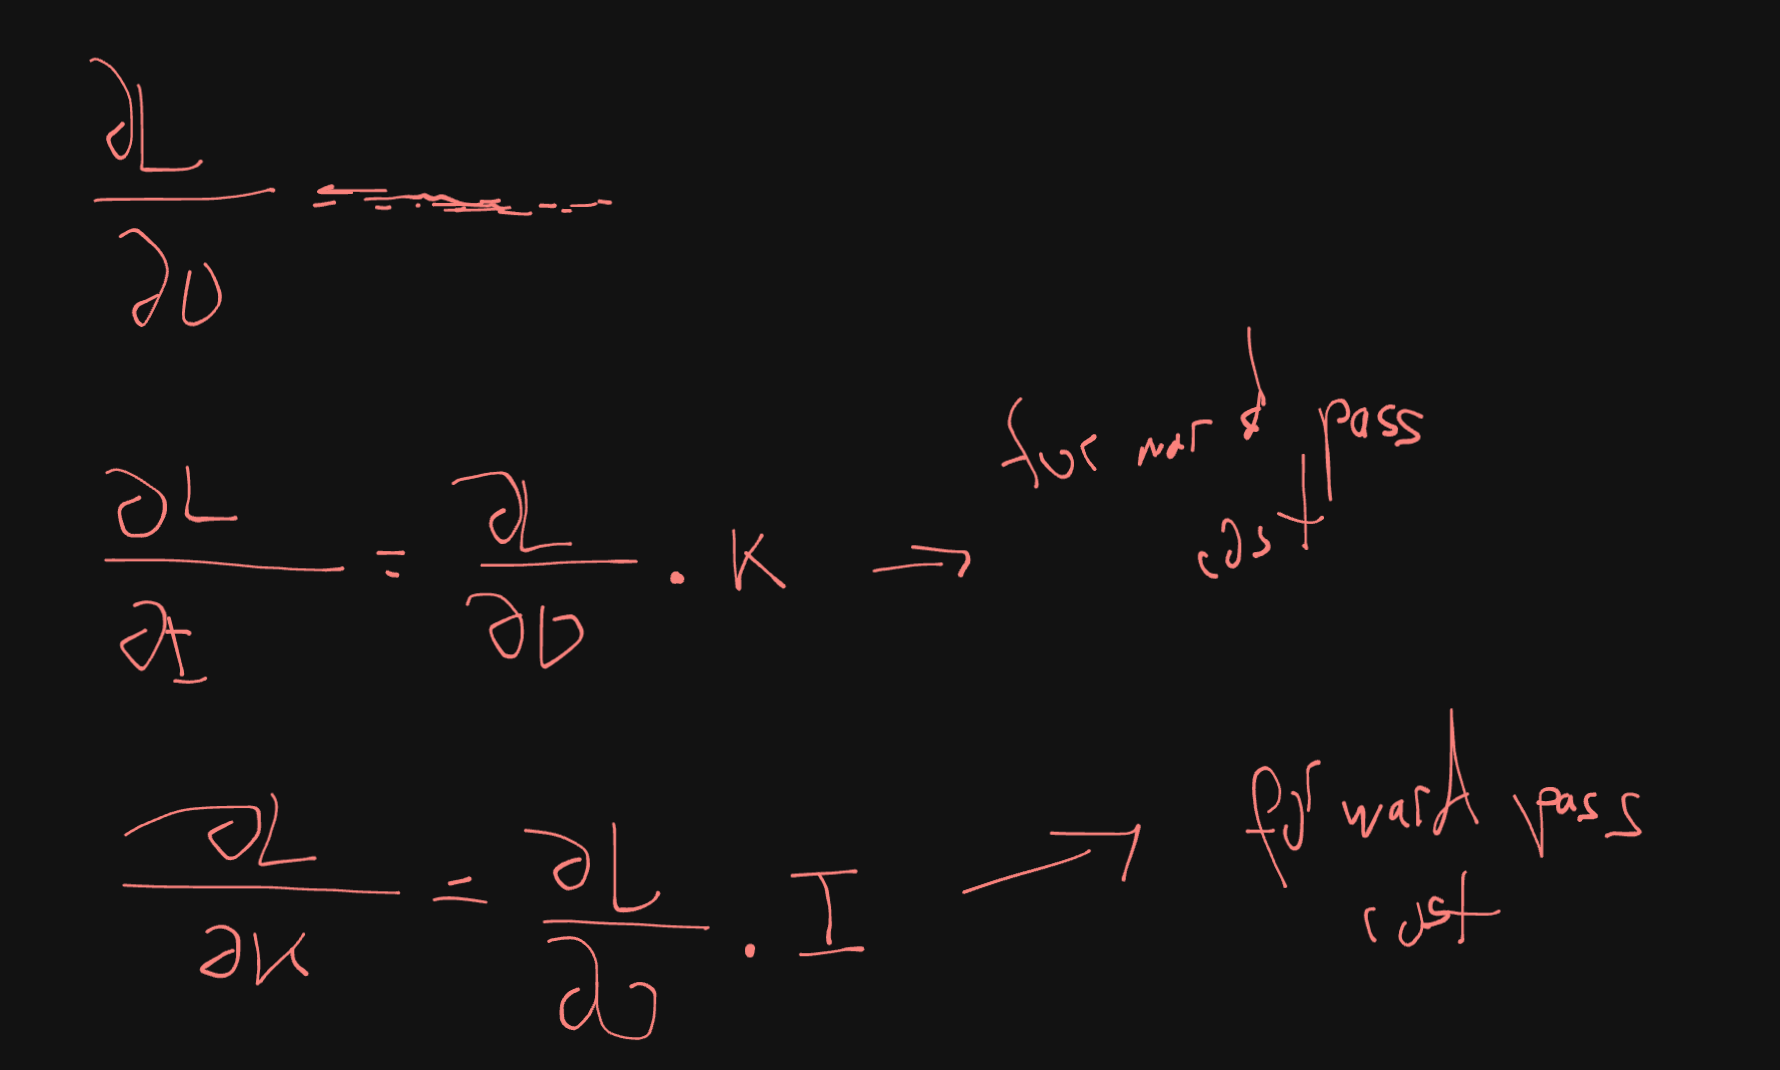

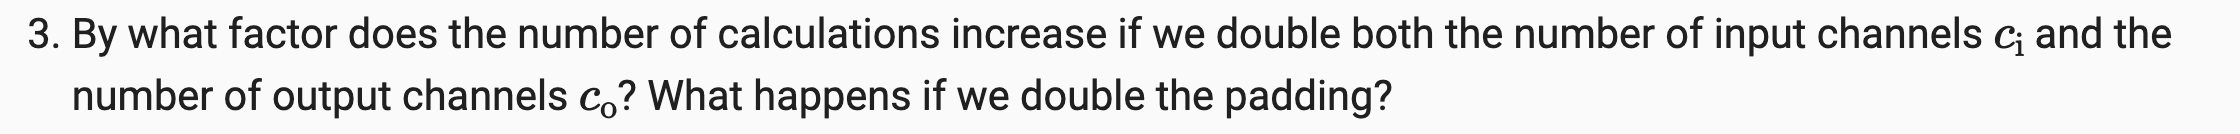

so, we have calculateed the number of operatiions needed for convolution:
multiplications: $$c_o \cdot h_{out} \cdot w_{out} \cdot (c_i \cdot k_h \cdot k_w)$$
additions: $$c_o \cdot h_{out} \cdot w_{out} \cdot (c_i \cdot k_h \cdot k_w - 1)$$


if we double the output channels and input - the number of computations increases by 4, and if we triple - by 9, and so on

if we double the padding, all that changes - it is hout and wout - they will be biger